In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
train = pd.read_csv("data_diac_train.csv",delimiter = ',')
test = pd.read_csv("data_diac_test.csv", delimiter = ',')

In [ ]:
HEIGHT = 16
WIDTH = 16

In [ ]:
train_x = train.iloc[:,1:]
train_y = train.iloc[:,0]
del train

test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]
del test

In [ ]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(1275, 256) (1275,) (318, 256) (318,)


In [ ]:
def rotate(image):
    image = image.reshape([HEIGHT, WIDTH])
    # image = np.fliplr(image)
    # image = np.rot90(image)
    return image

In [ ]:
train_x = np.asarray(train_x)
train_x = np.apply_along_axis(rotate, 1, train_x)
print ("train_x:",train_x.shape)

test_x = np.asarray(test_x)
test_x = np.apply_along_axis(rotate, 1, test_x)
print ("test_x:",test_x.shape)

train_x: (1275, 16, 16)
test_x: (318, 16, 16)


In [ ]:
train_x = train_x.astype('float32')
train_x /= 255
test_x = test_x.astype('float32')
test_x /= 255

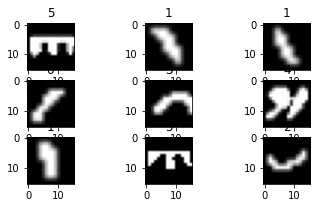

In [ ]:
for i in range(100, 109):
    plt.subplot(330 + (i+1))
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    plt.title(train_y[i])

In [ ]:
num_classes = train_y.nunique()

In [ ]:
train_y = np_utils.to_categorical(train_y,num_classes)
test_y = np_utils.to_categorical(test_y,num_classes)
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

train_y:  (1275, 9)
test_y:  (318, 9)


In [ ]:
train_x = train_x.reshape(-1, HEIGHT, WIDTH, 1)
test_x = test_x.reshape(-1, HEIGHT, WIDTH, 1)

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size= 0.1, random_state=7)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(HEIGHT, WIDTH,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       3328      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y, epochs=25, batch_size=52, verbose=1, \
                    validation_data=(val_x, val_y))

Epoch 1/25
23/23 [==============================] - 4s 21ms/step - loss: 1.7142 - accuracy: 0.4220 - val_loss: 0.6506 - val_accuracy: 0.8672
Epoch 2/25
23/23 [==============================] - 0s 9ms/step - loss: 0.6613 - accuracy: 0.7881 - val_loss: 0.2156 - val_accuracy: 0.9531
Epoch 3/25
23/23 [==============================] - 0s 8ms/step - loss: 0.4359 - accuracy: 0.8666 - val_loss: 0.1514 - val_accuracy: 0.9609
Epoch 4/25
23/23 [==============================] - 0s 7ms/step - loss: 0.2817 - accuracy: 0.9215 - val_loss: 0.0887 - val_accuracy: 0.9844
Epoch 5/25
23/23 [==============================] - 0s 7ms/step - loss: 0.2105 - accuracy: 0.9329 - val_loss: 0.0606 - val_accuracy: 0.9922
Epoch 6/25
23/23 [==============================] - 0s 6ms/step - loss: 0.2173 - accuracy: 0.9372 - val_loss: 0.0347 - val_accuracy: 0.9922
Epoch 7/25
23/23 [==============================] - 0s 6ms/step - loss: 0.1206 - accuracy: 0.9660 - val_loss: 0.0276 - val_accuracy: 0.9922
Epoch 8/25
23/23 [=

In [ ]:
def plotgraph(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

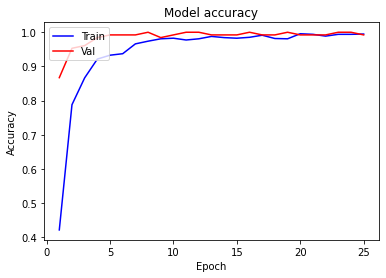

In [ ]:
plotgraph(epochs, acc, val_acc)

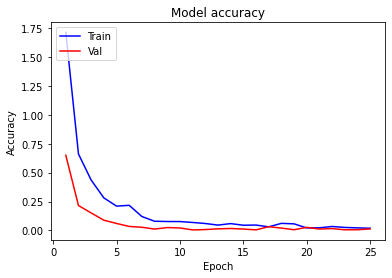

In [ ]:
plotgraph(epochs, loss, val_loss)

In [ ]:
score = model.evaluate(test_x, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.030864965170621872
Test accuracy: 0.9937106966972351


In [ ]:
y_pred = model.predict(test_x)
y_pred = (y_pred > 0.5)

10/10 [==============================] - 0s 2ms/step


In [ ]:
cm = metrics.confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))

In [ ]:
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37]])

In [ ]:
model.save('../model_diac', save_format="h5")